In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Date                                                                  
2023-10-18 00:00:00+00:00  28328.341797  28328.341797  28889.009766   
2023-10-19 00:00:00+00:00  28719.806641  28719.806641  28892.474609   
2023-10-20 00:00:00+00:00  29682.949219  29682.949219  30104.085938   
2023-10-21 00:00:00+00:00  29918.412109  29918.412109  30287.482422   
2023-10-22 00:00:00+00:00  29993.896484  29993.896484  30199.433594   

Price                               Low          Open       Volume  
Ticker                          BTC-USD       BTC-USD      BTC-USD  
Date                                                                
2023-10-18 00:00:00+00:00  28174.251953  28413.531250  12724128586  
2023-10-19 00:00:00+00:00  28177.988281  28332.416016  14448058195  
2023-10-20 00:00:00+00:00  28601.669922  28732.812500  21536125230  
2023-10-21 00:00:

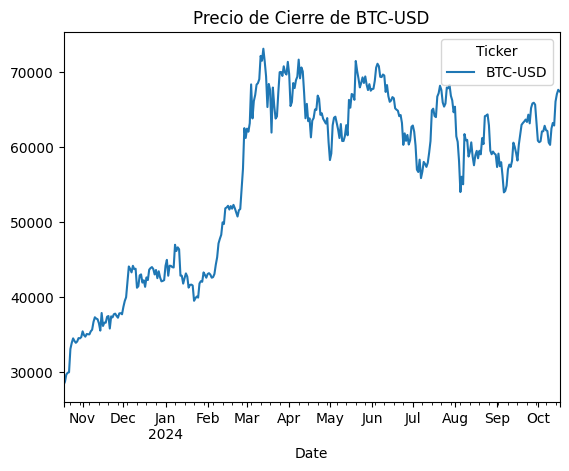

In [19]:
ticker = 'BTC-USD'  
data = yf.download(ticker, start="2023-10-18", end="2024-10-18") 
print(data.head())

data['Adj Close'].plot(title=f"Precio de Cierre de {ticker}")
plt.show()

In [32]:
bitcoin = data.iloc[:, :1]
bitcoin.head(5)

Price,Adj Close
Ticker,BTC-USD
Date,
2023-10-18 00:00:00+00:00,28328.341797
2023-10-19 00:00:00+00:00,28719.806641
2023-10-20 00:00:00+00:00,29682.949219
2023-10-21 00:00:00+00:00,29918.412109
2023-10-22 00:00:00+00:00,29993.896484


In [21]:
bitcoin['Log_Returns'] = np.log(bitcoin['Adj Close'] / bitcoin['Adj Close'].shift(1))

mean_return = bitcoin['Log_Returns'].mean()
std_dev = bitcoin['Log_Returns'].std()

num_simulaciones = 1000  
dias_proyeccion = 340

precio_inicial = bitcoin['Adj Close'].iloc[-1]

simulaciones_precios = np.zeros((dias_proyeccion, num_simulaciones))

simulaciones_precios[0] = precio_inicial


In [22]:
bitcoin

Price,Adj Close,Log_Returns
Ticker,BTC-USD,
Date,,
2023-10-18 00:00:00+00:00,28328.341797,NaN
2023-10-19 00:00:00+00:00,28719.806641,0.013724
2023-10-20 00:00:00+00:00,29682.949219,0.032986
2023-10-21 00:00:00+00:00,29918.412109,0.007901
2023-10-22 00:00:00+00:00,29993.896484,0.002520
...,...,...
2024-10-13 00:00:00+00:00,62851.375000,-0.005421
2024-10-14 00:00:00+00:00,66046.125000,0.049581


In [24]:
tamano_muestra= 100
#sacar muestras
muestra = np.random.choice(bitcoin['Log_Returns'], tamano_muestra)
muestra

array([-0.00838777, -0.03525391, -0.00661016, -0.04662976,  0.01308248,
        0.02291143, -0.05457905, -0.01008382,  0.01536731, -0.01687024,
        0.02009547,  0.01214875,  0.02092454,  0.00579371, -0.04053959,
       -0.00930535,  0.04420139,  0.00812374, -0.01238851, -0.02126225,
               nan, -0.00994516,  0.01263777,  0.01073866, -0.02526116,
        0.02195288,  0.00041478,  0.02869224,  0.02291143,  0.01580134,
       -0.00449325,  0.09069529,  0.03894551, -0.00165786, -0.01514324,
       -0.01852886,  0.01308248, -0.0248315 ,  0.00650453,  0.02092454,
       -0.00053102,  0.01481439,  0.04958055, -0.01682144,  0.01523424,
       -0.00034199, -0.00358116, -0.01247438, -0.01354163, -0.02167404,
        0.03537848,  0.0177426 ,  0.00349313, -0.07363199, -0.00778374,
        0.01097396,  0.09812341,  0.02592785,  0.03193999,  0.01148288,
        0.05966668,  0.01495264,  0.02033131,  0.01495264,  0.0029063 ,
        0.02092454,  0.0207393 , -0.00053102, -0.0174066 ,  0.05

In [25]:
muestras_generadas = np.array([])
num_muestras = 1000

for i in range (num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(muestra, tamano_muestra, replace=True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas


array([[-0.00838777, -0.0174066 , -0.01238851, ..., -0.04662976,
         0.00579371,  0.01464538],
       [-0.00661016,  0.01214875,  0.02291143, ...,  0.00241533,
         0.00579371, -0.01305211],
       [ 0.02291143,  0.02033131, -0.01456587, ..., -0.01286049,
        -0.07363199,  0.0107566 ],
       ...,
       [-0.00053102, -0.01305211,  0.0207393 , ...,  0.04420139,
        -0.01008382, -0.00778374],
       [ 0.01308248, -0.01247438,  0.00256533, ..., -0.02526116,
        -0.00831657,  0.02291143],
       [-0.0174066 , -0.00277399,  0.02592785, ...,  0.02009547,
        -0.00358116, -0.00358116]])

In [26]:
for t in range(1, dias_proyeccion):
    
    random_returns = np.random.normal(mean_return, std_dev, num_simulaciones)
    
    simulaciones_precios[t] = simulaciones_precios[t-1] * np.exp(random_returns)


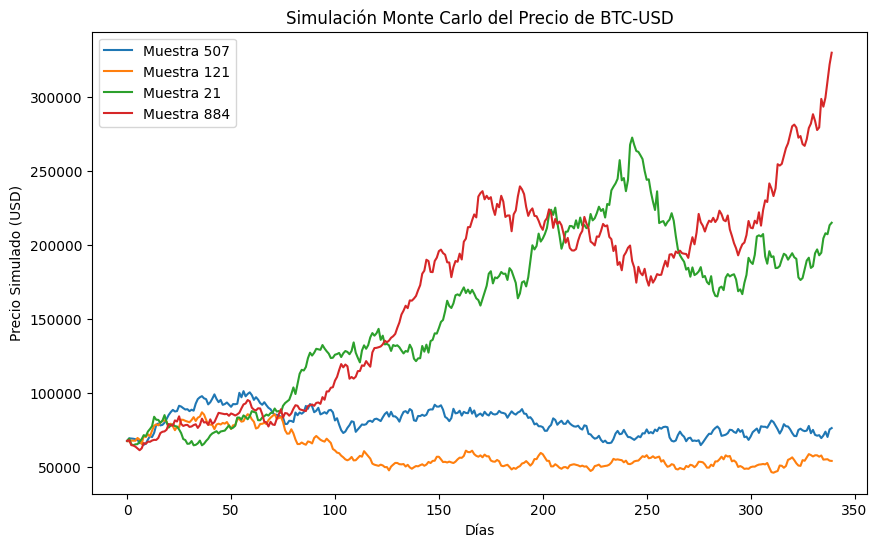

In [35]:
# Seleccionar 4 muestras aleatorias para graficar
num_muestras_a_graficar = 4
indices_aleatorios = np.random.choice(range(num_simulaciones), size=num_muestras_a_graficar, replace=False)

# Graficar las 4 trayectorias simuladas
plt.figure(figsize=(10, 6))
for idx in indices_aleatorios:
    plt.plot(simulaciones_precios[:, idx], label=f'Muestra {idx+1}')
    
plt.title(f"Simulación Monte Carlo del Precio de {ticker}")
plt.xlabel("Días")
plt.ylabel("Precio Simulado (USD)")
plt.legend()
plt.show()